In [2]:
import os
#os.chdir('/Users/ahutchin/Desktop/')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import numpy as np

In [4]:
wcdf = pd.read_excel('Copy of FIFA WC 2022 Players Stats .xlsx')
#wcdf = pd.read_excel('Copy of FIFA WC 2022 Players Stats .xlsx', keep_default_na=False,na_values=['-'],na_filter=True)
print(wcdf.shape)
print(sorted(wcdf))

(814, 18)
[' Appearances', 'Assists Provided ', 'Brand Sponsor/Brand Used', 'Clean Sheets', 'Club ', 'Dribbles per 90', 'FIFA Ranking ', 'Goals Scored ', 'Interceptions per 90', 'National Team Jersey Number', 'National Team Kit Sponsor', 'Nationality ', 'Player DOB', 'Player Name ', 'Position', 'Save Percentage', 'Tackles per 90', 'Total Duels Won per 90']


Loaded in the data set and checked the shape (814 rows by 18 columns).

In [42]:
print(wcdf.head())
wcdf = wcdf


  Nationality  FIFA Ranking National Team Kit Sponsor Position  \
0   Argentina             2                    Adidas       GK   
1   Argentina             2                    Adidas       GK   
2   Argentina             2                    Adidas       GK   
3   Argentina             2                    Adidas       DF   
4   Argentina             2                    Adidas       DF   

   National Team Jersey Number Player DOB         Club        Player Name  \
0                         23.0 1992-09-02  Aston Villa  Emiliano Martinez   
1                          1.0 1986-10-16        River      Franco Armani   
2                         12.0 1992-05-20   Villarreal     Geronimo Rulli   
3                         19.0 1988-02-12      Benfica   Nicolas Otamendi   
4                          8.0 1991-10-28      Sevilla       Marcos Acuna   

   Appearances  Goals Scored  Assists Provided  Dribbles per 90  \
0            7             0               0.0             0.00   
1     

Printed the first 5 rows of the dataframe to see what mising data im dealing with.

In [6]:
wcdf.isna().sum()

Nationality                    0
FIFA Ranking                   0
National Team Kit Sponsor      1
Position                       0
National Team Jersey Number    1
Player DOB                     0
Club                           0
Player Name                    0
 Appearances                   0
Goals Scored                   1
Assists Provided               1
Dribbles per 90                1
Interceptions per 90           1
Tackles per 90                 1
Total Duels Won per 90         1
Save Percentage                2
Clean Sheets                   0
Brand Sponsor/Brand Used       1
dtype: int64

Checked to see how many missing values were in each column

In [7]:
print(wcdf['National Team Kit Sponsor'].isna().idxmax())
wcdf.loc[232:234]


233


,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
232,USA,13,Nike,GK,1.0,1994-06-24 00:00:00,Arsenal,Matt Turner,4,-,-,-,-,-,-,0.5333,0.5,Nike
233,USA,13,NaN,GK,12.0,1995-06-09 00:00:00,Luton Town,Ethan Horvath,0,-,-,-,-,-,-,-,-,Puma
234,USA,13,Nike,GK,25.0,1989-05-31 00:00:00,New York City FC,Sean Johnson,0,-,-,-,-,-,-,-,-,Nike


By getting the index of the missing value, I can then get the indicies for the entry before and entry after the missing value and fill in the correct data. I know that the missing value should be NIKE because all 3 players are on the same team and therfore have the same National Team Kit Sponsor.

In [8]:
wcdf['National Team Kit Sponsor'].fillna('Nike',inplace = True)
wcdf.loc[232:234]

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
232,USA,13,Nike,GK,1.0,1994-06-24 00:00:00,Arsenal,Matt Turner,4,-,-,-,-,-,-,0.5333,0.5,Nike
233,USA,13,Nike,GK,12.0,1995-06-09 00:00:00,Luton Town,Ethan Horvath,0,-,-,-,-,-,-,-,-,Puma
234,USA,13,Nike,GK,25.0,1989-05-31 00:00:00,New York City FC,Sean Johnson,0,-,-,-,-,-,-,-,-,Nike


In [9]:
print(wcdf['Brand Sponsor/Brand Used'].isna().idxmax())
wcdf.loc[693:695]

694


,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
693,Cameroon,33,One All Sports,DF,17.0,1997-08-15 00:00:00,Philadelphia Union,Olivier Mbaizo,N.A,N.A,N.A,N.A,N.A,N.A,N.A,-,-,Adidas
694,Cameroon,33,One All Sports,DF,21.0,1995-01-26 00:00:00,Nantes,Jean Charles Castelletto,2,1,1,0,3,1.5,6,-,-,NaN
695,Cameroon,33,One All Sports,DF,25.0,1997-06-23 00:00:00,Seattle Sounders,Nouhou Tolo,3,0,0,1.67,2,3,6.33,-,-,Adidas


In [10]:
wcdf['Brand Sponsor/Brand Used'].fillna('Adidas',inplace = True)
wcdf.loc[693:695]

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
693,Cameroon,33,One All Sports,DF,17.0,1997-08-15 00:00:00,Philadelphia Union,Olivier Mbaizo,N.A,N.A,N.A,N.A,N.A,N.A,N.A,-,-,Adidas
694,Cameroon,33,One All Sports,DF,21.0,1995-01-26 00:00:00,Nantes,Jean Charles Castelletto,2,1,1,0,3,1.5,6,-,-,Adidas
695,Cameroon,33,One All Sports,DF,25.0,1997-06-23 00:00:00,Seattle Sounders,Nouhou Tolo,3,0,0,1.67,2,3,6.33,-,-,Adidas


All of the remaining misisng values can be changed to zero without effecting the unstructured data. Due to some missing values being a '-', 'N.A' or 'N,A' the .fillna command would miss a lot of the issues. Therfore, each character value representing missing data must be changed individually.

In [11]:
wcdf.replace('-',0, inplace = True)
wcdf.replace('N.A',0, inplace = True)
wcdf.replace('N,A', 0, inplace = True)
wcdf.replace('NaN', 0, inplace=True)
wcdf.fillna(0, inplace = True)
wcdf.isna().sum()

Nationality                    0
FIFA Ranking                   0
National Team Kit Sponsor      0
Position                       0
National Team Jersey Number    0
Player DOB                     0
Club                           0
Player Name                    0
 Appearances                   0
Goals Scored                   0
Assists Provided               0
Dribbles per 90                0
Interceptions per 90           0
Tackles per 90                 0
Total Duels Won per 90         0
Save Percentage                0
Clean Sheets                   0
Brand Sponsor/Brand Used       0
dtype: int64

In [12]:
#wcdf = wcdf.rename(columns = {' Appearances':'Appearances'})
wcdf = wcdf.rename(columns={col: col.strip() for col in wcdf.columns})
wcdf.isna().sum()

Nationality                    0
FIFA Ranking                   0
National Team Kit Sponsor      0
Position                       0
National Team Jersey Number    0
Player DOB                     0
Club                           0
Player Name                    0
Appearances                    0
Goals Scored                   0
Assists Provided               0
Dribbles per 90                0
Interceptions per 90           0
Tackles per 90                 0
Total Duels Won per 90         0
Save Percentage                0
Clean Sheets                   0
Brand Sponsor/Brand Used       0
dtype: int64

When trying to change Goals Scored to type int, i discovered there was a white space at the end of the column name (which i shouldve caught in the begining when i was looking at a print out of the column names). Instead of just changing one column name at a time like i had orginally attempted with 'wcdf = wcdf.rename(columns = {' Appearances':'Appearances'}', i used the second line of code to strip all the white space from begining and ends of the column names to be on the safe side.

In [13]:
print(wcdf.dtypes)

Nationality                     object
FIFA Ranking                     int64
National Team Kit Sponsor       object
Position                        object
National Team Jersey Number    float64
Player DOB                      object
Club                            object
Player Name                     object
Appearances                      int64
Goals Scored                   float64
Assists Provided               float64
Dribbles per 90                float64
Interceptions per 90           float64
Tackles per 90                 float64
Total Duels Won per 90         float64
Save Percentage                float64
Clean Sheets                   float64
Brand Sponsor/Brand Used        object
dtype: object


In [14]:
wcdf['Player DOB'] = pd.to_datetime(wcdf['Player DOB'])
wcdf['Goals Scored'] = wcdf['Goals Scored'].astype(int)
print(wcdf.dtypes)

Nationality                            object
FIFA Ranking                            int64
National Team Kit Sponsor              object
Position                               object
National Team Jersey Number           float64
Player DOB                     datetime64[ns]
Club                                   object
Player Name                            object
Appearances                             int64
Goals Scored                            int64
Assists Provided                      float64
Dribbles per 90                       float64
Interceptions per 90                  float64
Tackles per 90                        float64
Total Duels Won per 90                float64
Save Percentage                       float64
Clean Sheets                          float64
Brand Sponsor/Brand Used               object
dtype: object


In [15]:
# create a new dictionary to change string values to numbers so that i can run correlations later
changed = {'Adidas':1, 'Hummel':2, 'Kappa':3, 'Majid':4, 'Marathon':5, 'New Balance':6, 'Nike':7, 'One All Sports':8, 'Puma':9}
wcdf['Sponsor2'] = wcdf['National Team Kit Sponsor'].replace(changed)

#########################   Analysis #######################

In [ ]:
''' Analysis Questions:
~ Who is the youngest player? Oldest? 
    ~ Average age of player?
        ~ Among teams? Among tournament as a whole? 
~ Does age correlate with how many appearances a player had?
~ How many players are in each position?    
~ Which goalkeeper had the highest save percentage? The lowest? 
    ~ Was there a correlation between results and number of appearances?
~ Does the team ranking have any effect on who the team sponsor is?
~ What is the tackle, dribble and interception difference between the various field positions?
~ Which player scored the most goals of the tournament?
    ~ Which regular season club had the greatest number of players appear? The least?'''

(2001.0, 2005.0)

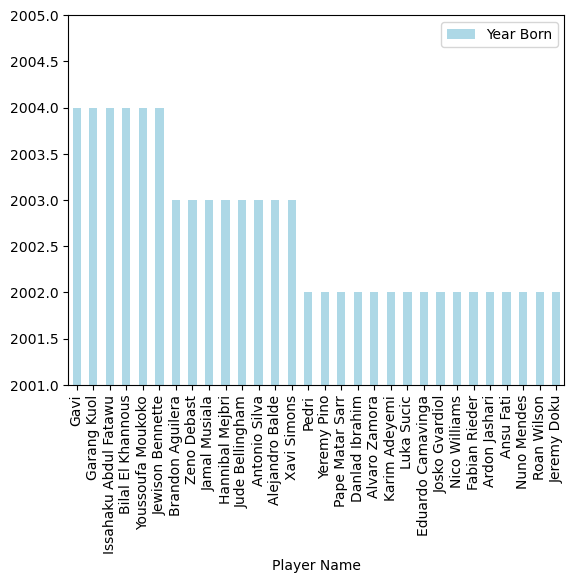

In [16]:
wcdf['Year Born'] = wcdf['Player DOB'].dt.year
wcdf.head()
youngest = wcdf.sort_values('Year Born', ascending = False)
youngest20 = youngest.head(30)
youngest20.plot(x = 'Player Name', y= 'Year Born', kind = 'bar', color = 'lightblue')
plt.ylim(2001,2005)

The above graph shows the top 30 youngest players, all of whom were born after 2001. The youngest 6 players were born in 2004 making them only 18 years old when the tournament occured.

In [17]:
#find the age differnece between oldest and youngest players
agediff = wcdf['Year Born'].max() - wcdf['Year Born'].min()
print(agediff)

22


In [47]:
#find avg age of all players
avgage = wcdf['Year Born'].mean()
avgage2 = int(avgage)
print('The avg age of all players is: ',2022 - avgage2, 'years old')

The avg age of all players is:  27 years old


In [45]:
#locate oldest player
oldest = wcdf['Year Born'].min()
oldestid = wcdf['Year Born'].idxmin()
oldestname = wcdf.loc[oldestid, 'Player Name']
print(oldestname,':',oldest,':', (2022 - 1982), 'years old')

Alfredo Talavera : 1982 : 40 years old


In [44]:
#locate all other stasts on oldest player
print(wcdf[wcdf['Player Name'] == 'Alfredo Talavera'])

Alfredo Talavera : 1982 : 40 years old
    Nationality  FIFA Ranking National Team Kit Sponsor Position  \
511     Mexico             15                    Adidas       GK   

     National Team Jersey Number Player DOB    Club       Player Name  \
511                          1.0 1982-09-18  Juarez  Alfredo Talavera   

     Appearances  Goals Scored  Assists Provided  Dribbles per 90  \
511            0             0               0.0              0.0   

     Interceptions per 90  Tackles per 90  Total Duels Won per 90  \
511                   0.0             0.0                     0.0   

     Save Percentage  Clean Sheets Brand Sponsor/Brand Used  Sponsor2  \
511              0.0           0.0                    Pirma         1   

     Year Born  
511       1982  


The age difference between the youngest and oldest player is 22 years. The average player age at the time of tournament is 27 years old. The oldest Player is Alfredo Talavera, born in 1982 and was 40 years old at the time of tournament. We can also see that Talavera is a GK for Mexico and had 0 appearnces in the tournamnet.

In [20]:
#find average player age for each team
team_age = wcdf.groupby("Nationality")["Year Born"].mean()
team_age = team_age.astype(int)
team_age = 2022 - team_age
print(team_age)
print(' ')
print("Range of average age amoung teams is only",team_age.max()-team_age.min(),"years")

Nationality
Argentina       28
Australia       28
Belgium         29
Brazil          28
Cameroon        27
Canada          28
Costa Rica      28
Croatia         28
Denmark         28
Ecuador         26
England         27
France          27
Germany         27
Ghana           25
Iran            29
Japan           29
Mexico          29
Morocco         27
Netherlands     27
Poland          28
Portugal        27
Qatar           28
Saudi Arabia    28
Senegal         26
Serbia          27
South Korea     28
Spain           26
Switzerland     28
Tunisia         28
USA             26
Uruguay         28
Wales           27
Name: Year Born, dtype: int64
 
Range of average age amoung teams is only 4 years


We can see that the average player age among teams are all very similar with there only being a range of 4 years between the highest and lowest average ages.

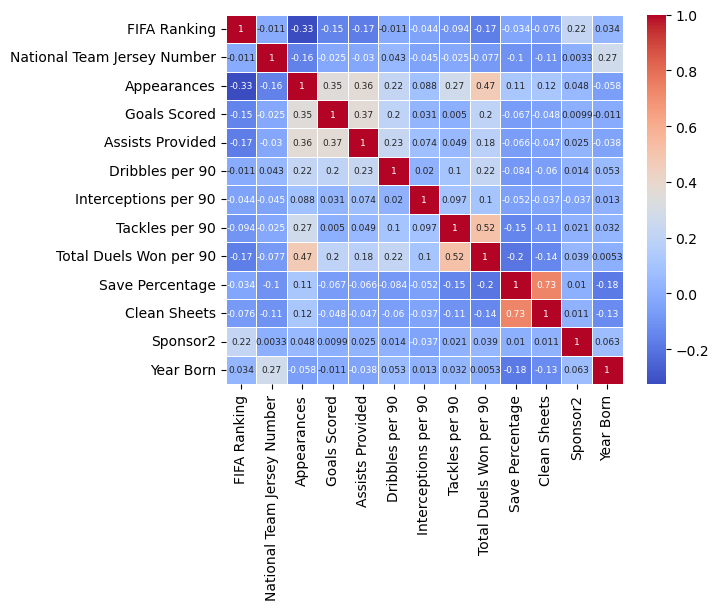

In [21]:
corrmatrix = wcdf.corr()
sns.heatmap(corrmatrix, annot=True, cmap = 'coolwarm', linewidths = .5, annot_kws={'size': 6.5})
plt.show()

This shows an overall correlation matrix among the structured datafields to help give an overall idea of which fields might be correlated or not.

In [22]:
agecorr = ['Year Born', 'Appearances']
age_matrix = wcdf[agecorr].corr()
print(age_matrix)

             Year Born  Appearances
Year Born     1.000000    -0.058438
Appearances  -0.058438     1.000000


The correlation between age and number of appearances is ever so slightly negative. This means that as age increases, number of appearances decreases which makes sense for professional sports. Typically, the older you get, the less games you play in. However because the correlation is so close to 0, we can also infer that for this specific tournament, there isnt a great correlation between age and number of appearances because the more experienced players are the ones you want playing and those players are typically "older".

In [23]:
#find the number of unique positions in teh df
num_positions = wcdf['Position'].nunique()
positiontype = wcdf['Position'].unique()

print(num_positions)
print(f'The DataFrame contains {num_positions} different player positions:')
print(positiontype)


4
The DataFrame contains 4 different player positions:
['GK' 'DF' 'MF' 'FW']


In [24]:
#group individual players into catagories based on tehir positions
position_counts = wcdf.groupby('Position').size()
print(position_counts)

Position
DF    262
FW    200
GK     98
MF    254
dtype: int64


The position with the most number of players is defender.

Text(0.5, 1.0, 'the 40 GKs with highest save %')

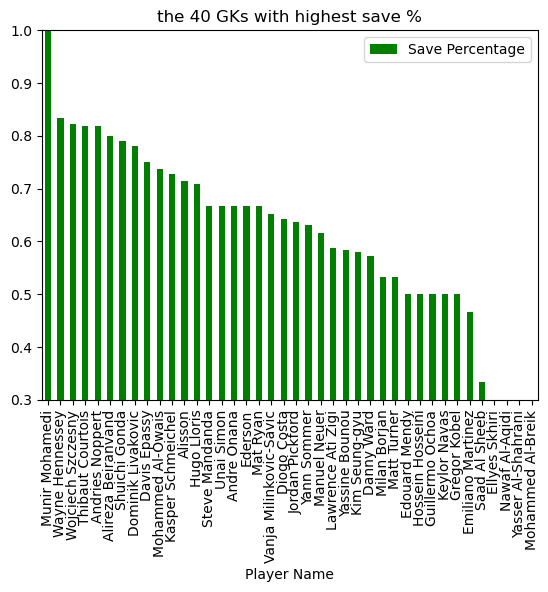

In [25]:
gkhigh = wcdf.sort_values('Save Percentage', ascending = False)
gkhigh = gkhigh.head(40)
gkhigh.plot(x = 'Player Name', y = 'Save Percentage', kind = 'bar', color = 'green')
plt.ylim(.3,1)
plt.title("the 40 GKs with highest save %")

We can see that Munir Mohamedi had the highest save percentage at 100%.

Text(0.5, 1.0, 'the 58 GKs with lowest save %')

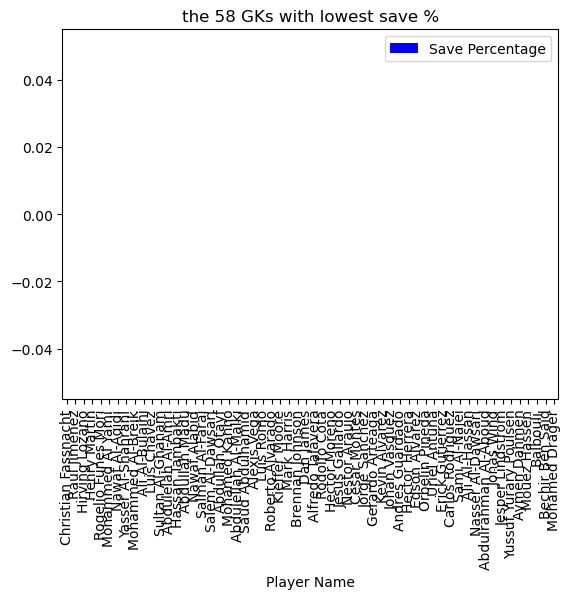

In [48]:
gklow = wcdf.sort_values('Save Percentage', ascending = True)
gklow = gklow.head(58)
gklow.plot(x = 'Player Name', y = 'Save Percentage', kind = 'bar', color = 'blue')
plt.title("the 58 GKs with lowest save %")

Since there are only 98 GKs, I was able to create two graphs with the highest 40 and lowest 58. Only 36 GKs had a save percentage greater than 0. The 0% save percentages are more likely due to GK's not getting any playing time, and less likely to due with their skill level.

In [27]:
gkcorr = ['Save Percentage', 'Appearances', 'FIFA Ranking', 'Year Born']
gk_matrix = wcdf[gkcorr].corr()
print(gk_matrix)

                 Save Percentage  Appearances  FIFA Ranking  Year Born
Save Percentage         1.000000     0.113988     -0.033783  -0.182907
Appearances             0.113988     1.000000     -0.325883  -0.058438
FIFA Ranking           -0.033783    -0.325883      1.000000   0.033759
Year Born              -0.182907    -0.058438      0.033759   1.000000


Save percentage and number of Appearances are slightly positively correlated. This makes sense since each team typically carries 3-4 GKs on their roster but usually only 1 plays in the games. Therefore, you have to play to accumulate saves. 

Interestingly, the correlation between Save Percentage and FIFA Ranking is slightly negative. One possible explanation for this is that the better the team is (higher FIFA ranking, the less times the GK touches the ball in a game since the team as a whole is theoretically better than their oppenant). From personal experience I know that the goal of the field players is to score goals and make sure the GK doesnt have to amek a save. Essentially, if the GK doesn't have to make a save, then the ball has zero chance of going in the net and your team has zero chance of losing.

In [28]:
sponsors = wcdf['National Team Kit Sponsor'].nunique()
sponsorname = wcdf['National Team Kit Sponsor'].unique()

print(sponsors)
print(f'The DataFrame contains {sponsors} different sponsors:')
print(sponsorname)


9
The DataFrame contains 9 different sponsors:
['Adidas' 'Nike' 'Puma' 'Marathon' 'Majid' 'Hummel' 'Kappa' 'New Balance'
 'One All Sports']


In [29]:
sponsor_counts = wcdf.groupby('National Team Kit Sponsor').size()
print(sponsor_counts)

National Team Kit Sponsor
Adidas            178
Hummel             26
Kappa              26
Majid              25
Marathon           26
New Balance        25
Nike              333
One All Sports     24
Puma              151
dtype: int64


In [30]:
sponsorcorr = ['FIFA Ranking', 'Sponsor2']
sponsor_matrix = wcdf[sponsorcorr].corr()
print(sponsor_matrix)

              FIFA Ranking  Sponsor2
FIFA Ranking      1.000000  0.218045
Sponsor2          0.218045  1.000000


There appears to be a somewhat positive relationship between FIFA Rank and the team sponsor. This is likely to do with the idea that the better you are, the higher the chance that you have a better/more well known sponsor.

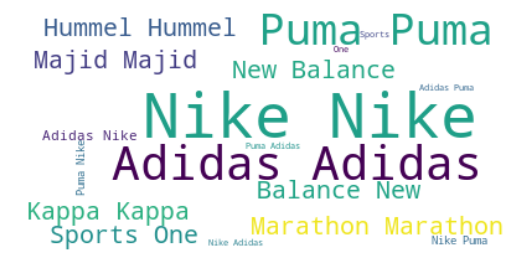

In [31]:
from wordcloud import WordCloud

# create a string of words from the desired column
text = ' '.join(wcdf['National Team Kit Sponsor'])

# generate a word cloud, 
wordcloud = WordCloud(background_color='white', max_font_size=50).generate(text)

# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


We can use a word cloud to show the more common team sponsors.

In [32]:
brands = wcdf['Brand Sponsor/Brand Used'].nunique()
brandname = wcdf['Brand Sponsor/Brand Used'].unique()

print(brands)
print(f'The DataFrame contains {brands} different brands:')
print(brandname)


14
The DataFrame contains 14 different brands:
['Adidas' 'Nike' 'NIke' 'Puma' 'Nike ' 'Lotto' 'Under Armour'
 'New Balance' 'Mizuno' 'Asics' 'Umbro' 'Pirma' 'Charly' 'Pima']


In [33]:
brand_counts = wcdf.groupby('Brand Sponsor/Brand Used').size()
print(brand_counts)

Brand Sponsor/Brand Used
Adidas          260
Asics             1
Charly            1
Lotto             3
Mizuno           14
NIke              2
New Balance       8
Nike            425
Nike              1
Pima              1
Pirma             2
Puma             92
Umbro             1
Under Armour      3
dtype: int64


The most utilized brand is Nike with 426 players wearinb their gear. The least utilized brands are Umbro, Pirma, Charly, Asics, and Pima with only 1 player wearing each.

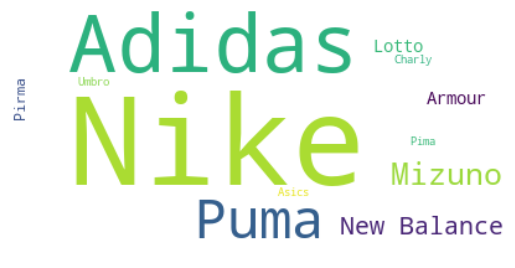

In [34]:
# create a string of words from the desired column
text2 = ' '.join(wcdf['Brand Sponsor/Brand Used'])

# generate a word cloud, 
wordcloud2 = WordCloud(background_color='white').generate(text2)

# display the word cloud
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()


In [35]:
position_stats = wcdf.groupby('Position')['Tackles per 90', 'Dribbles per 90', 'Interceptions per 90', 'Total Duels Won per 90'].mean()
print(position_stats)

          Tackles per 90  Dribbles per 90  Interceptions per 90  \
Position                                                          
DF              1.317748         0.431183              0.766374   
FW              0.759400         1.750800              0.705950   
GK              0.000000         0.000000              0.000000   
MF              1.444724         0.890787              0.709134   

          Total Duels Won per 90  
Position                          
DF                      4.276832  
FW                      4.046150  
GK                      0.027041  
MF                      3.721811  


/var/folders/2c/t32x6k8j5pv9t2nqb54pfhrh0000gp/T/ipykernel_50670/3756443129.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  position_stats = wcdf.groupby('Position')['Tackles per 90', 'Dribbles per 90', 'Interceptions per 90', 'Total Duels Won per 90'].mean()


Mid Fielders had the highest Tackles per 90. Forwards had the highest Dribbles per 90. Defenders had the highest Interceptions per 90. All of these statistics make logical sense for the game. While all positions (excpt GKs) Tackle, Dribble and Intercept, each position has a higher likelihood to perform certain tasks. Mid Fielders and Defenders are the most likely to tackle. Forwards cover the most ground while holding onto the ball and therfore typically have the highest number of dribbles, and all 3 positions have equal chances for interceptions. Forwards and defenders have the highest mean for Duels won per 90. This is expected as those two positions clash the most in a given game and the chnaces of one or the other winning a head to head is fairly even.

/Users/ahutchin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128016 (\N{GOAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


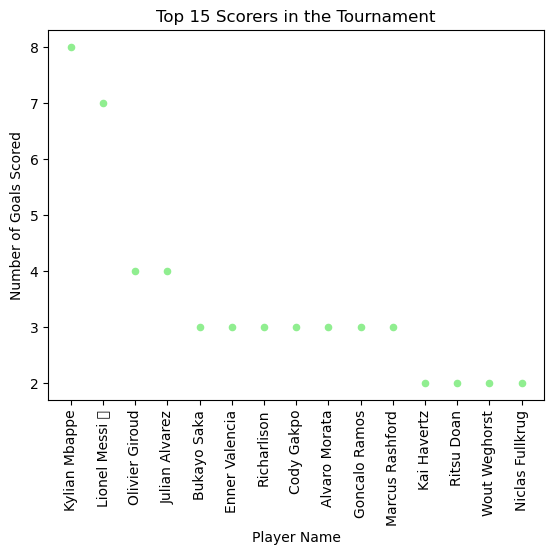

In [36]:
#sort highest goals 
scorers = wcdf.sort_values("Goals Scored" , ascending=False)
top15scorers = scorers.head(15)
#create plot with highest number of goals and the players that scored them
top15scorers.plot(x='Player Name', y='Goals Scored', kind='scatter', color = 'lightgreen')

plt.ylabel('Number of Goals Scored')
plt.xticks(rotation = 90)
plt.title('Top 15 Scorers in the Tournament')
plt.show()

We can see that Kylian Mbappe scored the most number of goals in the tournament with 8 goals

In [37]:
#count the number of unique clubs
clubs = wcdf['Club'].nunique()
clubname = wcdf['Club'].unique()

print(clubs)
print(f'The DataFrame contains {clubs} different clubs:')
print(' ')
print(clubname)

318
The DataFrame contains 318 different clubs:
 
['Aston Villa' 'River' 'Villarreal' 'Benfica' 'Sevilla' 'Lyon'
 'Real Betis' 'Atletico Madrid' 'Tottenham' 'Manchester United' 'Juventus'
 'Bayer Leverkusen' 'Brighton' 'Atlanta United' 'PSG' 'Inter' 'Roma'
 'Manchester City' 'West Ham United' 'Rennes' 'Bayern Munich' 'Barcelona'
 'Man Utd' 'Arsenal' 'AC Milan' 'Liverpool' 'Real Madrid' 'Monaco'
 'Marseille' 'Eintracht Frankfurt' 'Borussia Monchengladbach'
 'Dinamo Zagreb' 'Osijek' 'AEK Athens' 'Zenit' 'Rangers' 'Celtic'
 'Stuttgart' 'RB Leipzig' 'Sassuolo' 'Chelsea' 'Atalanta' 'Torino'
 'Red Bull Salzburg' 'Hoffenheim' 'Osasuna' 'Hajduk Split' 'Al Wehda'
 'Wydad AC' 'West Ham' 'Besiktas' 'Brest' 'Qatar SC' 'Valladolid'
 'Fiorentina' 'Sampdoria' 'Standard Liege' 'Angers' 'Genk' 'Toulouse'
 'Burnley' 'QPR' 'Bari' 'Al-Ittihad' 'Feyenoord' 'Ajax' 'Heerenveen' 'PSV'
 'Antwerp' 'Club Brugge' 'Everton' 'Newcastle United' 'Borussia Dortmund'
 'Leicester City' 'Palmeiras' 'UNAM' 'Flamengo' 'Por

In [38]:
#return the count of players associated with each club
club_counts = wcdf.groupby('Club').size()
print(club_counts)

Club
AC Milan         7
AEK Athens       5
AFC Wimbledon    1
AS Monaco        2
Abha             1
                ..
Wolves           4
Wydad AC         3
Young Boys       3
Zamalek          1
Zenit            1
Length: 318, dtype: int64


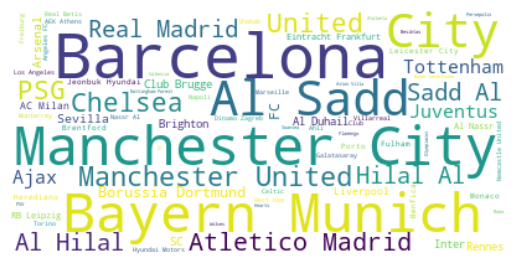

In [39]:
# create a string of words from the desired column
text3 = ' '.join(wcdf['Club'])

# generate a word cloud, 
wordcloud3 = WordCloud(background_color='white', max_font_size=50).generate(text3)

# display the word cloud
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
club_counts = wcdf['Club'].value_counts()
most_common_club = club_counts.index[0]
print('Club with greatest number of players appearing in the world cup: ', most_common_club)

club_counts2 = wcdf['Club'].value_counts()
least_common_club = club_counts2.index[-1]
print('Club with least number of players appearing in the world cup: ', least_common_club)

Club with greatest number of players appearing in the world cup:  Barcelona
Club with least number of players appearing in the world cup:  Vancouver Whitecaps
